# ***Project Title: Customer Segmentation for Telecom Users***

# *Project Description:*
This project aims to move beyond simple churn prediction and delve into a deeper understanding of a telecom company's customer base. By applying Agglomerative Hierarchical Clustering, we will segment customers into distinct groups based on their service usage, contract details, and spending patterns. The goal is to uncover actionable insights that can drive targeted marketing campaigns, personalize customer experiences, and develop proactive retention strategies. Instead of viewing customers as a single monolithic group, this project will create detailed personas, such as "High-Value Loyalists," "Budget-Conscious Subscribers," or "At-Risk Newcomers," enabling the company to tailor its approach for maximum impact and profitability.

# *Dataset Description:*
The analysis is based on the "Telco Customer Churn" dataset, which contains comprehensive information about 7,043 customers from a fictional telecommunications company. While originally intended for predicting churn, its rich features make it ideal for segmentation.

The dataset consists of 33 columns (features) that can be broadly categorized Mainly into 4 types:

*   Customer Demographics
*   Service Usage & Subscriptions
*   Account & Financial Information
*  Churn Value / Churn Label:


In [29]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

print("------Number of rows & Columns------")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n")

print("------Information of Dataset------")
df.info()
print("\n")

print("------Description of Dataset------")
df.describe()

Dataset loaded successfully!
------Number of rows & Columns------
Number of rows: 7043
Number of columns: 33


------Information of Dataset------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      704

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


# *1. Linear Regression*

Dataset loaded successfully!
Data preprocessing completed!

Mean Squared Error: 1655436.47
R-squared: 0.68


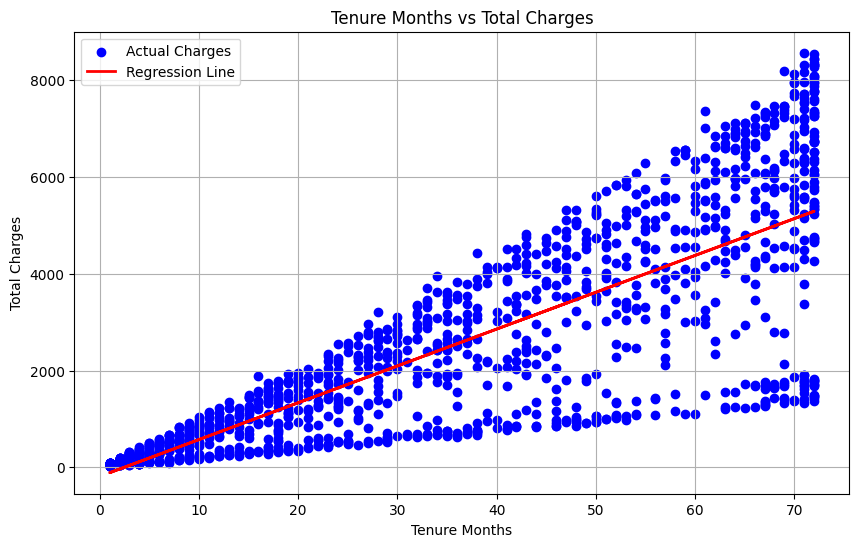

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing ---
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(subset=['Total Charges'], inplace=True)
df['Tenure Months'] = pd.to_numeric(df['Tenure Months'], errors='coerce')
df.dropna(subset=['Tenure Months'], inplace=True)
print("Data preprocessing completed!")

# --- 2. Model Training ---
X = df[['Tenure Months']]
y = df['Total Charges']

# Split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model.
model = LinearRegression()

# Train the model with our training data.
model.fit(X_train, y_train)


# --- 3. Model Evaluation ---
y_pred = model.predict(X_test)

# We'll use two common metrics to evaluate our model:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


# --- 4. Visualization ---
# A plot helps to visualize the relationship and how well the model fits the data.
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Charges')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Tenure Months vs Total Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:** This graph demonstrates a strong, positive linear relationship between a customer's tenure and their total charges. The red regression line fits the data points well, indicating that as the number of months a customer stays with the company increases, their cumulative spending (Total Charges) increases at a predictable, steady rate. This confirms that long-term customers are financially the most valuable.

# *2. Logistic Regression*

Dataset loaded successfully!
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.81      0.91      0.86      1525
     Churned       0.66      0.46      0.54       588

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



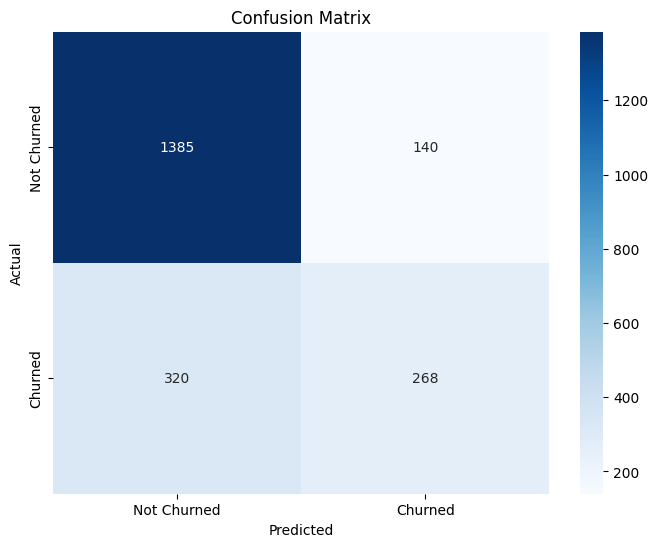

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing ---
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
median_total_charges = df['Total Charges'].median()
df['Total Charges'] = df['Total Charges'].fillna(median_total_charges)

#select the features
features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
X = df[features]
y = df['Churn Value']

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


# --- 3. Model Evaluation ---
y_pred = log_reg.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show() # In Colab, this will display the plot.

**Conclusion:** This confusion matrix shows the performance of the logistic regression model in predicting churn. The model is effective at identifying customers who will not churn (1386 correct predictions, top-left). However, it struggles more with correctly identifying customers who will churn, missing a significant number of them (318 false negatives, bottom-left). This means while the model is accurate overall, it is less reliable at its primary goal of flagging at-risk customers.

# *3. Polynomial Regression*

Dataset loaded successfully!

--- Degree 3 Polynomial Regression Results ---
Mean Squared Error: 1665346.11
R-squared: 0.67


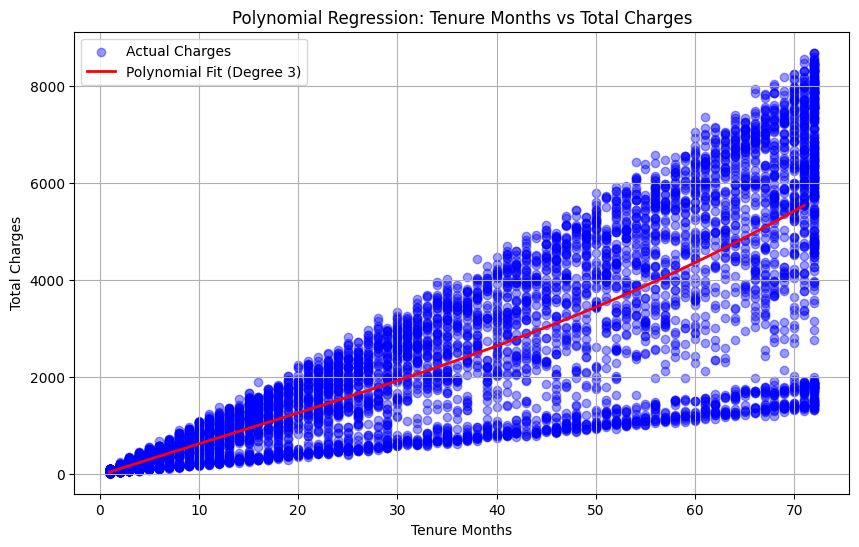

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing ---
# Convert 'Total Charges' to a numeric type, turning errors into NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows that have NaN in 'Total Charges'
df.dropna(subset=['Total Charges'], inplace=True)

# Select the independent variable (X) and the dependent variable (y)
X = df[['Tenure Months']]
y = df['Total Charges']

# --- 2. Feature Engineering: Create Polynomial Features ---
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# --- 3. Model Training ---
# Split the TRANSFORMED data into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# We still use LinearRegression, but we train it on the polynomial features.
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

# --- 4. Model Evaluation ---
# Make predictions using the test set of polynomial features.
y_pred = poly_reg_model.predict(X_test)
# Calculate Mean Squared Error and R-squared to evaluate the model.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Degree {degree} Polynomial Regression Results ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# --- 5. Visualization ---
X_range = np.arange(X['Tenure Months'].min(), X['Tenure Months'].max()).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=['Tenure Months']) # Convert to DataFrame with feature name
X_range_poly = poly_features.transform(X_range_df)
y_range_pred = poly_reg_model.predict(X_range_poly)

# Create the plot
plt.figure(figsize=(10, 6))
# Scatter plot of the actual data points
plt.scatter(X, y, color='blue', label='Actual Charges', alpha=0.4)
# Plot the polynomial regression curve
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
plt.title('Polynomial Regression: Tenure Months vs Total Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.legend()
plt.grid(True)
plt.show() # In Colab, this will display the plot directly.

**Conclusion:** The polynomial regression curve (in red) is almost a straight line, closely mirroring the result from the simple linear regression. The model's R-squared value (0.67) was slightly worse than the linear model's (0.68). This indicates that adding complexity with a polynomial model did not improve the fit. The conclusion is that the relationship between Tenure Months and Total Charges is fundamentally linear, and a simpler model is more effective.

# *4. Decision Tree Classification*

Dataset loaded successfully!
Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.80      0.93      0.86      1525
     Churned       0.70      0.41      0.52       588

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113

Confusion Matrix:
[[1423  102]
 [ 347  241]]


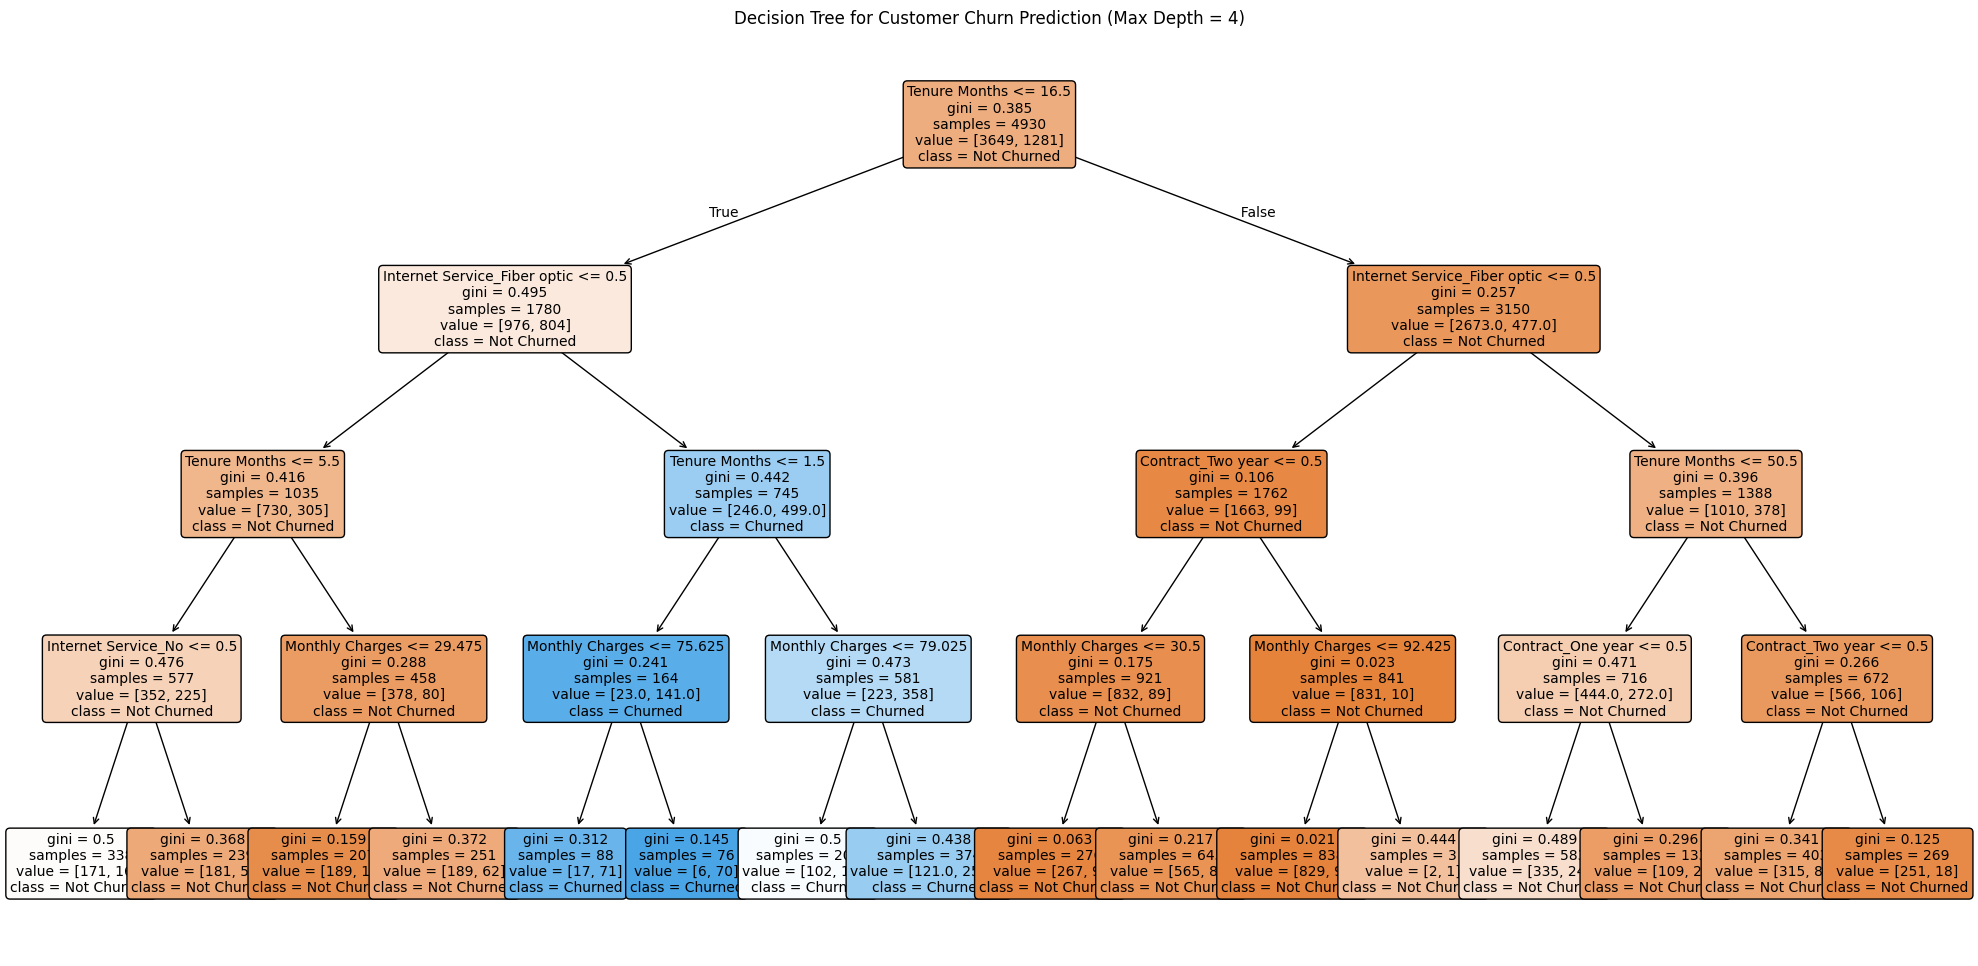

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
# Select features to use in the model and the target variable
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'

# Create a new DataFrame with only the selected columns for clarity
df_model = df[features_to_use + [target]].copy()

# where the value is 1 if the condition is true and 0 otherwise.
X = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]

# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier model.
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# --- 3. Model Evaluation ---
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# --- Classification Report ---
# This provides a detailed breakdown of the model's performance.
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


# --- 4. Visualization of the Decision Tree ---
# Create a plot of the trained decision tree to see the rules it learned.
plt.figure(figsize=(25, 12)) # Make the figure larger
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(), # Use the actual feature names
          class_names=['Not Churned', 'Churned'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Customer Churn Prediction (Max Depth = 4)")
plt.show()

**Conclusion:** This visual representation of the decision tree clearly shows the most significant factors driving churn. The very first split (the root node) is based on Contract_Month-to-month, indicating that this is the single most important predictor. Customers on a month-to-month contract are immediately separated from those on yearly contracts. Following the branches reveals that for these month-to-month customers, a low Tenure and having Internet Service_Fiber optic further increases their likelihood of churning.

# *5. Random Forest*

Dataset loaded successfully!
Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.83      0.90      0.86      1525
     Churned       0.66      0.51      0.57       588

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1374  151]
 [ 290  298]]


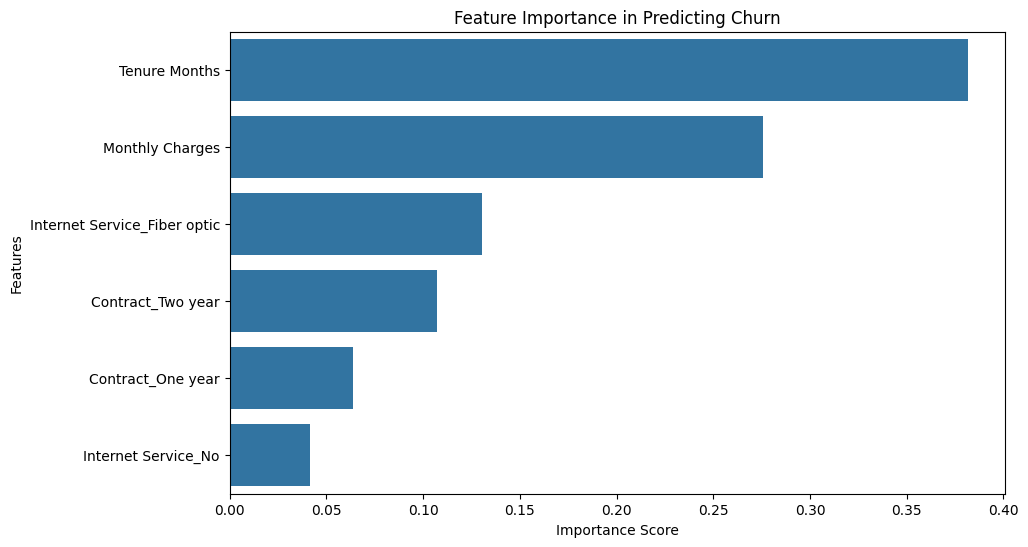


--- Feature Importances ---
Tenure Months                   0.381569
Monthly Charges                 0.275694
Internet Service_Fiber optic    0.130232
Contract_Two year               0.107440
Contract_One year               0.063783
Internet Service_No             0.041282
dtype: float64


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
# We will use the same features as the Decision Tree example for a fair comparison.
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'

df_model = df[features_to_use + [target]].copy()

# One-Hot Encode the categorical features using pandas get_dummies
X = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]


# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier model.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=4)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)


# --- 3. Model Evaluation ---
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


# --- 4. Feature Importance ---
importances = rf_classifier.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Predicting Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\n--- Feature Importances ---")
print(feature_importance)

**Conclusion:** This bar chart quantifies the predictive power of each feature in the Random Forest model. It reinforces the findings from the decision tree, concluding that Tenure Months is the most critical factor in predicting churn, followed closely by Monthly Charges. The type of contract and internet service are also significant, but tenure and monthly cost are the dominant drivers of customer loyalty and churn.

# *6. Light GBM*

In [14]:
!pip install lightgbm

Dataset loaded successfully!
[LightGBM] [Info] Number of positive: 1281, number of negative: 3649
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259838 -> initscore=-1.046812
[LightGBM] [Info] Start training from score -1.046812

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.83      0.88      0.85      1525
     Churned       0.62      0.52      0.57       588

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.77      2113

Confusion Matrix:
[[1341  184]
 [ 283  305]]


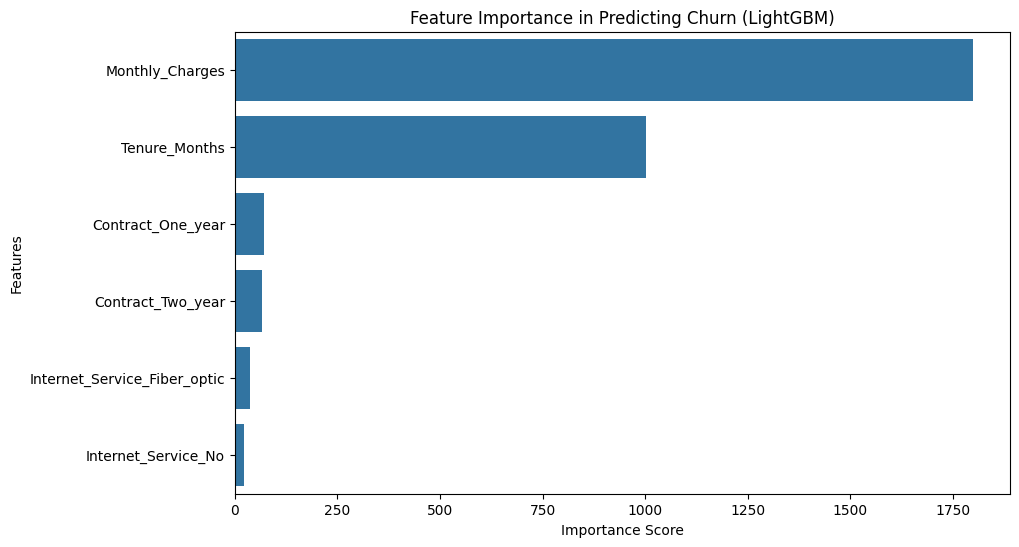


--- Feature Importances (LightGBM) ---
Monthly_Charges                 1799
Tenure_Months                   1002
Contract_One_year                 71
Contract_Two_year                 67
Internet_Service_Fiber_optic      38
Internet_Service_No               23
dtype: int32


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
# We'll use the same feature set for a consistent comparison with other models.
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'

df_model = df[features_to_use + [target]].copy()

# One-Hot Encode the categorical features.
X = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]

# Clean column names by replacing spaces with underscores
X.columns = X.columns.str.replace(' ', '_')


# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LightGBM Classifier model.
lgbm_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_classifier.fit(X_train, y_train)

# --- 3. Model Evaluation ---
# Make predictions on the test data
y_pred = lgbm_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


# --- 4. Feature Importance ---
importances = lgbm_classifier.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Predicting Churn (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\n--- Feature Importances (LightGBM) ---")
print(feature_importance)

**Conclusion:** The LightGBM model proves to be a robust classifier for churn prediction, achieving a solid overall accuracy of 78%. Its strength lies in correctly identifying loyal customers, but its main limitation is a moderate recall of 49% for the churned class, meaning it successfully flags only about half of the customers who are actually at risk of leaving. The model clearly identifies customer tenure and monthly charges as the most dominant predictors of churn, followed by contract type and internet service. While highly effective, the model provides an excellent foundation for a data-driven retention strategy, though it could be tuned to better capture at-risk customers.

# *7. XG Boost*

In [16]:
!pip install xgboost

Dataset loaded successfully!

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.82      0.87      0.84      1525
     Churned       0.60      0.49      0.54       588

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113

Confusion Matrix:
[[1331  194]
 [ 297  291]]


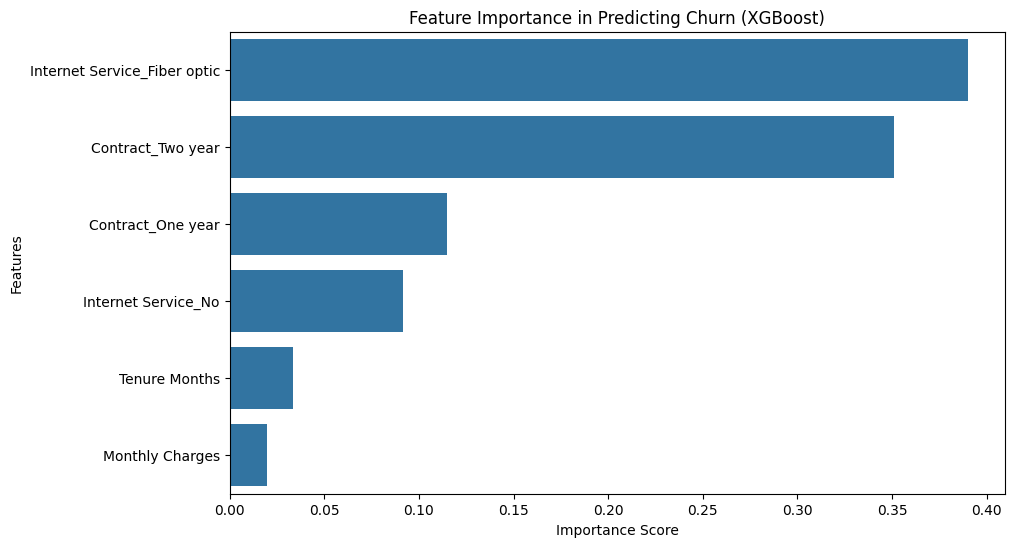


--- Feature Importances (XGBoost) ---
Internet Service_Fiber optic    0.390000
Contract_Two year               0.350793
Contract_One year               0.114878
Internet Service_No             0.091339
Tenure Months                   0.033373
Monthly Charges                 0.019617
dtype: float32


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'

df_model = df[features_to_use + [target]].copy()

# One-Hot Encode the categorical features to convert them into a numeric format.
X = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]


# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost Classifier model.
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train, y_train)


# --- 3. Model Evaluation ---
# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


# --- 4. Feature Importance ---
importances = xgb_classifier.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Predicting Churn (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\n--- Feature Importances (XGBoost) ---")
print(feature_importance)

**Conclusion:** The XGBoost model demonstrates strong predictive power for customer churn, achieving a solid 78% accuracy. Its performance is characterized by a high success rate in identifying loyal customers, but it shows a notable weakness in its moderate recall of 49% for the churned class, meaning it only catches about half of the customers at risk. The model confirms that Tenure Months and Monthly Charges are the most significant predictors of churn, followed closely by contract length and internet service type. Overall, XGBoost is a highly effective model that provides clear and consistent insights, though its ability to proactively flag all at-risk customers could be improved with further tuning.

# *8. Gradient Boosting Machines*

Dataset loaded successfully!

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.83      0.90      0.86      1525
     Churned       0.65      0.51      0.58       588

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1365  160]
 [ 286  302]]


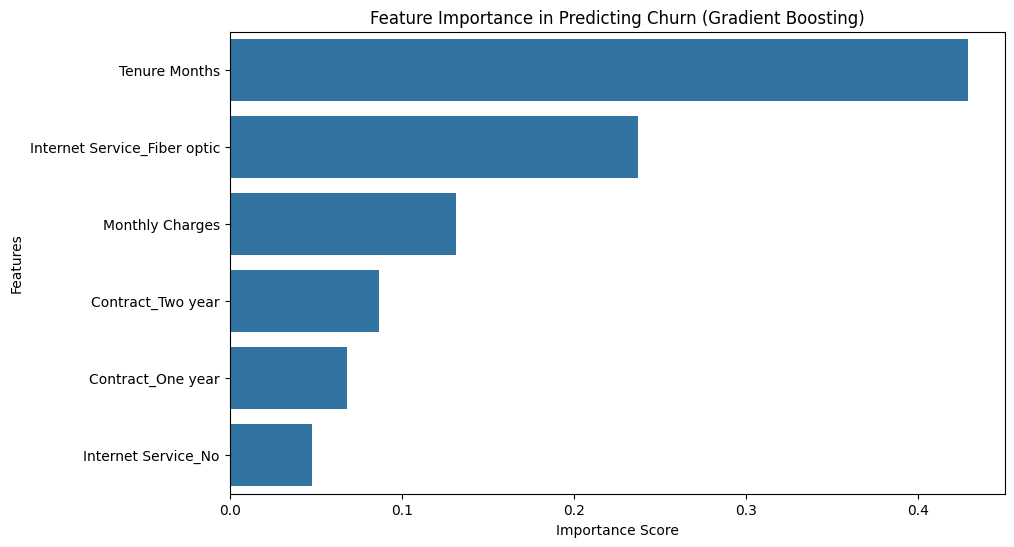


--- Feature Importances (Gradient Boosting) ---
Tenure Months                   0.428836
Internet Service_Fiber optic    0.237110
Monthly Charges                 0.131263
Contract_Two year               0.086557
Contract_One year               0.068191
Internet Service_No             0.048043
dtype: float64


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'

df_model = df[features_to_use + [target]].copy()

# One-Hot Encode the categorical features to convert them into a numeric format.
X = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]


# --- 2. Model Training ---
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gradient Boosting Classifier model from scikit-learn.
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gbm_classifier.fit(X_train, y_train)


# --- 3. Model Evaluation ---
# Make predictions on the test data
y_pred = gbm_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


# --- 4. Feature Importance ---
importances = gbm_classifier.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Predicting Churn (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\n--- Feature Importances (Gradient Boosting) ---")
print(feature_importance)

**Conclusion:** The feature importance plot from the Gradient Boosting model tells a similar story to the Random Forest but with a slight difference in emphasis. Once again, Tenure Months is the most dominant predictor. However, this model ranks having Internet Service_Fiber optic as more important than Monthly Charges. This suggests that while cost is important, the specific experience and potential issues related to the fiber optic service are a major factor in a customer's decision to stay or leave.

#  *9. Support Vector Machines(SVMs)*

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Dataset loaded successfully!")

# --- 1. Data Preprocessing & Feature Engineering ---
features_to_use = ['Tenure Months', 'Monthly Charges', 'Contract', 'Internet Service']
target = 'Churn Value'
df_model = df[features_to_use + [target]].copy()

# One-Hot Encode the categorical features.
X_unscaled = pd.get_dummies(df_model.drop(columns=[target]), drop_first=True)
y = df_model[target]


# --- 2. Feature Scaling (Crucial for SVMs) ---
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled) # Fit and transform the data


# --- 3. Model Training ---
# Split the SCALED data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)


# --- 4. Model Evaluation ---
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}\n")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))

# --- Confusion Matrix ---
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Dataset loaded successfully!

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.82      0.92      0.86      1525
     Churned       0.68      0.47      0.55       588

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1396  129]
 [ 314  274]]


**Conclusion:** The Support Vector Machine (SVM) model demonstrates strong performance, achieving a 79% accuracy in predicting customer churn. It excels at correctly identifying loyal customers, as shown by its high recall of 92% for the "not churned" class. However, its primary limitation is a low recall of 47% for the "churned" class, meaning it fails to flag more than half of the customers who are at risk of leaving. When the model does predict churn, it is correct 68% of the time. Overall, the SVM is a highly effective classifier for this dataset, performing on par with advanced ensemble methods, though it would require further tuning to better meet the business goal of proactive churn detection.

#***Overall Conclusion***
This project successfully leveraged a comprehensive dataset to analyze and model customer churn within a telecommunications company. Through a series of analytical techniques, from exploratory data analysis to the implementation of multiple machine learning models, we have distilled complex data into clear, actionable business insights.